StanfordIE requires Python2. Text cleaning seems to be easier in Python3. Anyway I am moving on to using Spacy

required packages install nltk numpy matplotlib scikit-learn 

# Insert article text here

In [3]:
article_text = u"""This is a the text from the article. 
We will break this into simpler sentence, and compare them with the reference of dubious claims.
Obama is born in Kenya. 
Lee Hsien Loong’s decision to leave Halimah Yacob is open to speculation, but this appears to be passive racism. The Singapore Prime Minister nonetheless need to be questioned, like whether if he perceives Halimah Yacob’s hijab a poor representation to Singapore.
There are hard questions to ask about Halimah Yacob as well. 
Like whether if she needs an English translator when speaking with other English-speakers, or whether if she takes direct instruction from Lee Hsien Loong as a puppet many believe her to be.
S$1.54 million-a-year for reading essay. How much further useless can Halimah Yacob get?
With her eyes glued on the scripts, Indian-turned-Malay President Halimah Yacob obediently read on live TV her first speech in Parliament as Singapore President. 
The “independent” President’s speech, written by the PAP Ministers, is as best a load of hot air, waxing lyrical about leadership, equality, meritocracy and a “bright future”.
Halimah Yacob is a puppet President appointed by Prime Minister Lee Hsien Loong. 
With Lee Hsien Loong’s control over the Election Department, her two opponent contestants were disqualified giving her a walkover."""

In [4]:
import re 

def replacing(text):  # not implement, but needed for the quotations and the apostrophes 
    # remove annoying characters
    chars = {
        '\xc2\x82' : ',',        # High code comma
        '\xc2\x84' : ',,',       # High code double comma
        '\xc2\x85' : '...',      # Tripple dot
        '\xc2\x88' : '^',        # High carat
        '\xc2\x91' : '\x27',     # Forward single quote
        '\xc2\x92' : '\x27',     # Reverse single quote
        '\xc2\x93' : '\x22',     # Forward double quote
        '\xc2\x94' : '\x22',     # Reverse double quote
        '\xc2\x95' : ' ',
        '\xc2\x96' : '-',        # High hyphen
        '\xc2\x97' : '--',       # Double hyphen
        '\xc2\x99' : ' ',
        '\xc2\xa0' : ' ',
        '\xc2\xa6' : '|',        # Split vertical bar
        '\xc2\xab' : '<<',       # Double less than
        '\xc2\xbb' : '>>',       # Double greater than
        '\xc2\xbc' : '1/4',      # one quarter
        '\xc2\xbd' : '1/2',      # one half
        '\xc2\xbe' : '3/4',      # three quarters
        '\xca\xbf' : '\x27',     # c-single quote
        '\xcc\xa8' : '',         # modifier - under curve
        '\xcc\xb1' : '',         # modifier - under line
        '\u2019' : '\x27'
    }

    def replace_chars(match):
        char = match.group(0)
        return chars[char]

    return re.sub('(' + '|'.join(chars.keys()) + ')', replace_chars, text)

In [5]:
article_text = replacing(article_text)

In [6]:
# article_text = clean(article_text) # to implement with some package from nltk to remove non standard characters.
# article_text = split_into_sentences(article_text) 

import nltk

article_text_list = nltk.sent_tokenize(article_text)


import re
import string

for i, sentence in enumerate(article_text_list):
#     regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html
    article_text_list[i] = re.sub(r'[^\x00-\x7f]',r'', sentence).encode('ascii', 'ignore')
    
    
print(article_text_list)

['This is a the text from the article.', 'We will break this into simpler sentence, and compare them with the reference of dubious claims.', 'Obama is born in Kenya.', 'Lee Hsien Loongs decision to leave Halimah Yacob is open to speculation, but this appears to be passive racism.', 'The Singapore Prime Minister nonetheless need to be questioned, like whether if he perceives Halimah Yacobs hijab a poor representation to Singapore.', 'There are hard questions to ask about Halimah Yacob as well.', 'Like whether if she needs an English translator when speaking with other English-speakers, or whether if she takes direct instruction from Lee Hsien Loong as a puppet many believe her to be.', 'S$1.54 million-a-year for reading essay.', 'How much further useless can Halimah Yacob get?', 'With her eyes glued on the scripts, Indian-turned-Malay President Halimah Yacob obediently read on live TV her first speech in Parliament as Singapore President.', 'The independent Presidents speech, written by

# Loading list of dubious claims

In [7]:
dubious_claims_list = ["This is a list of dubious claims.", 
                       "Obama is born in Kenya", 
                       "President Halimah is a puppet.", 
                       "PAP Ministers earn millions."]

# Extracting information from the text

In [8]:
import os
import pickle 

# output should be a list of three element list.
# [['Barack Obama', ' was', ' born'], ['Barack Obama', ' was born in', ' Hawaii']]

# article_claims = stanfordIE(article_text)

article_claims = []

for sentence in article_text_list[:]:
    os.system("echo \"{}\" > Stanford-OpenIE-Python/samples2.txt".format(sentence))
    !cat Stanford-OpenIE-Python/samples2.txt
    os.system("python Stanford-OpenIE-Python/main.py -f samples2.txt -o out5.txt")
    with open("out5.txt", "rb") as fp:   # Unpickling
        b = pickle.load(fp)
        print(b)
        article_claims.append(b)
        
print(article_claims)

# todo: combine them into one step to reduce loading time

This is a the text from the article.
[['This', ' is', ' text'], ['This', ' is text from', ' article']]
We will break this into simpler sentence, and compare them with the reference of dubious claims.
[['We', ' compare', ' them'], ['We', ' will break', ' this']]
Obama is born in Kenya.
[['Obama', ' is born in', ' Kenya'], ['Obama', ' is', ' born']]
Lee Hsien Loongs decision to leave Halimah Yacob is open to speculation, but this appears to be passive racism.
[['this', ' appears', ' racism'], ['Lee Hsien Loongs decision', ' is open to', ' speculation'], ['Lee Hsien Loongs decision', ' is', ' open'], ['Lee Hsien Loongs decision', ' leave', ' Halimah Yacob'], ['this', ' be', ' racism'], ['this', ' be', ' passive racism'], ['this', ' appears', ' passive racism']]
The Singapore Prime Minister nonetheless need to be questioned, like whether if he perceives Halimah Yacobs hijab a poor representation to Singapore.
[['Singapore Prime Minister', ' nonetheless need', ' questioned'], ['Singapore Pr

In [9]:
dubious_claims = []

for sentence in dubious_claims_list[:]:
    os.system("echo \"{}\" > Stanford-OpenIE-Python/samples2.txt".format(sentence))
    !cat Stanford-OpenIE-Python/samples2.txt
    os.system("python Stanford-OpenIE-Python/main.py -f samples2.txt -o out5.txt")
    with open("out5.txt", "rb") as fp:   # Unpickling
        b = pickle.load(fp)
        print(b)
        dubious_claims.append(b)
        
print(dubious_claims)

This is a list of dubious claims.
[['This', ' is', ' list'], ['This', ' is list of', ' dubious claims']]
Obama is born in Kenya
[['Obama', ' is born in', ' Kenya'], ['Obama', ' is', ' born']]
President Halimah is a puppet.
[['President Halimah', ' is', ' puppet']]
PAP Ministers earn millions.
[['PAP Ministers', ' earn', ' millions']]
[[['This', ' is', ' list'], ['This', ' is list of', ' dubious claims']], [['Obama', ' is born in', ' Kenya'], ['Obama', ' is', ' born']], [['President Halimah', ' is', ' puppet']], [['PAP Ministers', ' earn', ' millions']]]


In [10]:
article_claims_concat = [[" ".join(claim) for claim in sentence] for sentence in article_claims]
article_claims_flat = [item for sublist in article_claims_concat for item in sublist]

dubious_claims_concat = [[" ".join(claim) for claim in sentence] for sentence in dubious_claims]
dubious_claims_flat = [item for sublist in dubious_claims_concat for item in sublist]

In [11]:
print(article_claims_flat)
print(dubious_claims_flat)

['This  is  text', 'This  is text from  article', 'We  compare  them', 'We  will break  this', 'Obama  is born in  Kenya', 'Obama  is  born', 'this  appears  racism', 'Lee Hsien Loongs decision  is open to  speculation', 'Lee Hsien Loongs decision  is  open', 'Lee Hsien Loongs decision  leave  Halimah Yacob', 'this  be  racism', 'this  be  passive racism', 'this  appears  passive racism', 'Singapore Prime Minister  nonetheless need  questioned', 'Singapore Prime Minister  need  questioned', 'Singapore Prime Minister  be  questioned', 'hard questions  ask about  Halimah Yacob', 'hard questions  ask about  Halimah Yacob', 'questions  ask about  Halimah Yacob', 'questions  ask about  Halimah Yacob', 'Halimah Yacob  can get  much further useless', 'Halimah Yacob  can get  How much further useless', 'Halimah Yacob  can get  useless', 'Halimah Yacob  can get  much useless', 'Halimah Yacob  can get  How much useless', 'Halimah Yacob  can get  further useless', 'her eyes  glued on  scripts', '

In [12]:
def meshgrid(x,y): # DW code !!!
    return (
        [[x_ for x_ in x] for  _ in y],
        [[y_ for  _ in x] for y_ in y])

In [13]:
pair_mesh = meshgrid(article_claims_flat, dubious_claims_flat)
# print(pair_mesh)
print(len(pair_mesh))
print(len(pair_mesh[0]))
print(len(pair_mesh[0][0]))


print(pair_mesh[0][0][10],pair_mesh[1][0][10])

2
6
62
('this  be  racism', 'This  is  list')


# Comparison of similarity

In [14]:
import sys
sys.path.append('SIF/src')
import data_io, params, SIF_embedding

# input
wordfile = 'SIF/data/glove.840B.300d.txt' # word vector file, can be downloaded from GloVe website
weightfile = 'SIF/auxiliary_data/enwiki_vocab_min200.txt' # each line is a word and its frequency
weightpara = 1e-3 # the parameter in the SIF weighting scheme, usually in the range [3e-5, 3e-3]
rmpc = 0 # number of principal components to remove in SIF weighting scheme
sentences = ['this is an example sentence', 'this is another sentence that is slightly longer']

# load word vectors
(words, We) = data_io.getWordmap(wordfile)

# load word weights
word2weight = data_io.getWordWeight(weightfile, weightpara) # word2weight['str'] is the weight for the word 'str'
weight4ind = data_io.getWeight(words, word2weight) # weight4ind[i] is the weight for the i-th word

# load sentences
x, m = data_io.sentences2idx(sentences, words) # x is the array of word indices, m is the binary mask indicating whether there is a word in that location
w = data_io.seq2weight(x, m, weight4ind) # get word weights
# https://github.com/PrincetonML/SIF/issues/25

# set parameters
paramsz = params.params()
paramsz.rmpc = rmpc
# get SIF embedding
embeddings = SIF_embedding.SIF_embedding(We, x, w, paramsz) # embedding[i,:] is the embedding for sentence i
# print(embedding)

In [24]:
value_mesh = meshgrid([0]*len(article_claims_flat), [0]*len(dubious_claims_flat))

import numpy as np
for i,_ in enumerate(pair_mesh[0]):
    for j,_ in enumerate(pair_mesh[0][0]): 
        sentences = [pair_mesh[0][i][j], pair_mesh[1][i][j]]
        # load sentences
        x, m = data_io.sentences2idx(sentences, words) # x is the array of word indices, m is the binary mask indicating whether there is a word in that location
        w = data_io.seq2weight(x, m, weight4ind) # get word weights
        # https://github.com/PrincetonML/SIF/issues/25

        # set parameters
        paramsz = params.params()
        paramsz.rmpc = rmpc
        # get SIF embedding
        embeddings = SIF_embedding.SIF_embedding(We, x, w, paramsz) # embedding[i,:] is the embedding for sentence i
        # print(embeddings)
        print([pair_mesh[0][i][j], pair_mesh[1][i][j]])
        print(np.dot(embeddings[0,:], embeddings[1,:]))
#         print(np.dot(embeddings[0], embeddings[1])/(np.linalg.norm(embeddings[0])*np.linalg.norm(embeddings[1])))
        value_mesh[0][i][j] = np.dot(embeddings[0,:], embeddings[1,:])/(np.linalg.norm(embeddings[0])*np.linalg.norm(embeddings[1]))
#         value_mesh[0][i][j] = np.dot(embeddings[0,:], embeddings[1,:])

['This  is  text', 'This  is  list']
1.5558824840428425
['This  is text from  article', 'This  is  list']
1.396189177798559
['We  compare  them', 'This  is  list']
2.8408597200985204
['We  will break  this', 'This  is  list']
2.117164265998252
['Obama  is born in  Kenya', 'This  is  list']
0.8639785159968913
['Obama  is  born', 'This  is  list']
1.1137228961683527
['this  appears  racism', 'This  is  list']
1.9287306501420285
['Lee Hsien Loongs decision  is open to  speculation', 'This  is  list']
0.5324200335882641
['Lee Hsien Loongs decision  is  open', 'This  is  list']
0.30616186905610543
['Lee Hsien Loongs decision  leave  Halimah Yacob', 'This  is  list']
-0.8655530480307874
['this  be  racism', 'This  is  list']
1.322754451274678
['this  be  passive racism', 'This  is  list']
1.3457681349043868
['this  appears  passive racism', 'This  is  list']
1.8002502840548993
['Singapore Prime Minister  nonetheless need  questioned', 'This  is  list']
2.1049410015448027
['Singapore Prime Mi

['her two opponent contestants  were  disqualified', 'PAP Ministers  earn  millions']
4.836469384043495
['her opponent contestants  were disqualified With  Lee Hsien Loongs control', 'PAP Ministers  earn  millions']
3.21224007239995
['her two opponent contestants  were disqualified With  Lee Hsien Loongs control over Election Department', 'PAP Ministers  earn  millions']
3.836303730728082
['her two opponent contestants  were disqualified With  Lee Hsien Loongs control', 'PAP Ministers  earn  millions']
2.943733537510413


(6, 62)


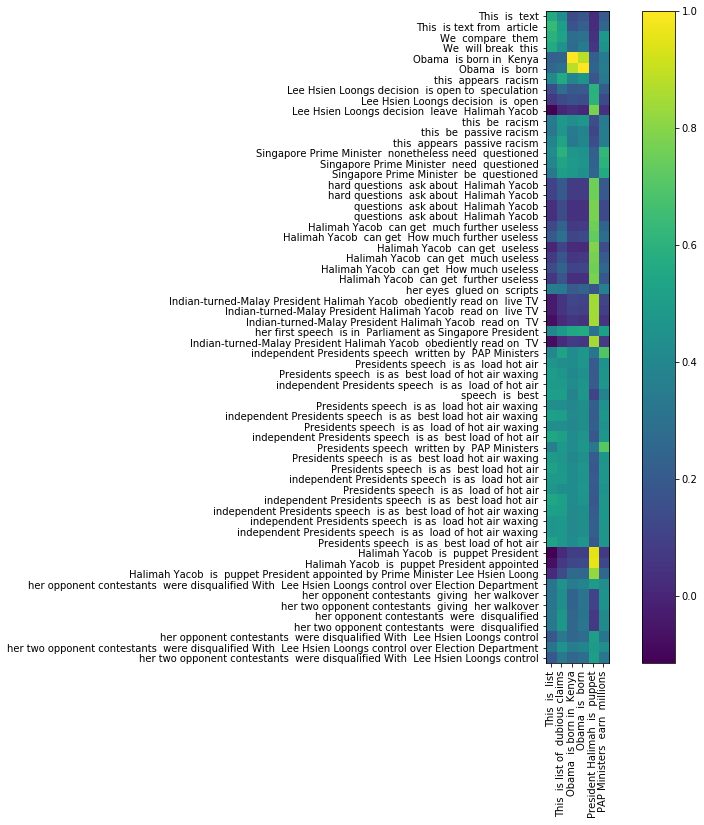

In [25]:
import matplotlib.pyplot as plt
print(np.shape(value_mesh[0]))
# fig, ax = plt.subplots(1,1)

# ax.imshow(value_mesh[0])
plt.figure(figsize=(12,12))
plt.imshow(np.transpose(value_mesh[0]))
plt.yticks(np.arange(len(article_claims_flat)), article_claims_flat)
plt.xticks(np.arange(len(dubious_claims_flat)), dubious_claims_flat, rotation='vertical')
plt.colorbar()
plt.show()